In [ ]:
import pandas as pd
import numpy as np
import pathlib 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tqdm import tqdm
import warnings
import pandas as pd
from sklearn.metrics import roc_curve, auc

warnings.filterwarnings('ignore')

data_version = "TMD_cov"
output_version = "20240910"

# outdir = "/media/hieunguyen/HNSD_mini/outdir"
outdir = "/media/hieunguyen/GSHD_HN01/outdir"
PROJECT = "TMD450_TCGA_data_analysis"
thres_hypo = 0.3
thres_hyper = 0.6
mode = "all"
selected_candi_features = "ratio_raw"
input_cancer_class = "Liver"

path_to_main_output = os.path.join(outdir, PROJECT, output_version)
if mode == "all":
    path_to_07_output = os.path.join(outdir, PROJECT, output_version, "07_output", input_cancer_class, "thres_hypo_{}_hyper_{}".format(thres_hypo, thres_hyper))
    path_to_08_output = os.path.join(outdir, PROJECT, output_version, "08_output", input_cancer_class, "thres_hypo_{}_hyper_{}".format(thres_hypo, thres_hyper))
    path_to_12_output = os.path.join(outdir, PROJECT, output_version, "12_output", input_cancer_class, "thres_hypo_{}_hyper_{}".format(thres_hypo, thres_hyper))
elif mode == "hypo_only":
    path_to_07_output = os.path.join(outdir, PROJECT, output_version, "07_output_all_hypo", input_cancer_class, "thres_hypo_{}_hyper_{}".format(thres_hypo, thres_hyper))
    path_to_08_output = os.path.join(outdir, PROJECT, output_version, "08_output_all_hypo", input_cancer_class, "thres_hypo_{}_hyper_{}".format(thres_hypo, thres_hyper))
elif mode == "hyper_only":
    path_to_07_output = os.path.join(outdir, PROJECT, output_version, "07_output_all_hyper", input_cancer_class, "thres_hypo_{}_hyper_{}".format(thres_hypo, thres_hyper))
    path_to_08_output = os.path.join(outdir, PROJECT, output_version, "08_output_all_hyper", input_cancer_class, "thres_hypo_{}_hyper_{}".format(thres_hypo, thres_hyper))

path_to_tf_output = os.path.join(outdir, PROJECT, output_version, "TF_output")
path_to_01_tf_output = os.path.join(path_to_tf_output, "01_output")

metadata = pd.read_excel("metadata_cfDNA_lowpdepth_TMD_bam_cov.xlsx")
metadata = metadata[metadata["Label"].isin([input_cancer_class, "Control"])]

candidf = pd.read_excel(os.path.join(path_to_08_output, "candi_reads_all_{}_vs_control.xlsx".format(input_cancer_class)))
candidf = candidf[["SampleID", "Label", selected_candi_features]]
ichorcnadf = pd.read_excel("./ichorCNA/metadata_cfDNA_lowpdepth.xlsx")

# keep only samples that have ichorCNA tumor fractions. 
ichorcnadf = ichorcnadf[(ichorcnadf["SampleID"].isin(candidf["SampleID"].unique())) & 
                        (ichorcnadf["ichorCNA"].isna() == False)][["SampleID", "ichorCNA"]]

tf_sampledf = pd.read_csv("./ichorCNA/analytical_LOD_TF.csv")
tf_candi_sampledf = pd.read_excel(os.path.join(path_to_12_output, "candi_reads_all_{}_vs_control.xlsx".format(input_cancer_class)))
maindf = candidf.merge(ichorcnadf, right_on = "SampleID", left_on = "SampleID")



In [ ]:
tf_candi_sampledf

In [ ]:
tf_sampledf

<Axes: xlabel='ratio_raw', ylabel='ichorCNA'>

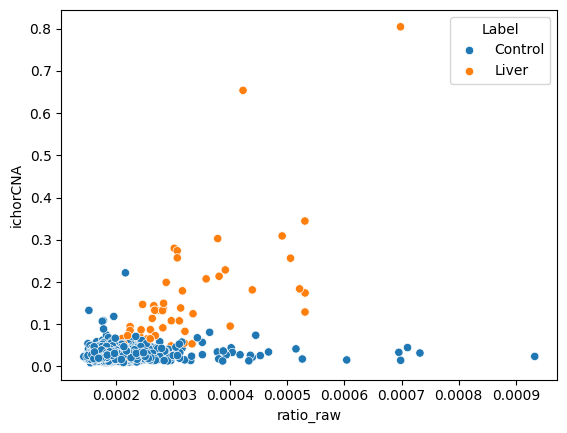

In [ ]:
sns.scatterplot(data = maindf, x = selected_candi_features, y = "ichorCNA", hue = "Label")